##IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [ ]:
data = pd.read_excel('http://117.53.47.247/Wzrd/traffic-bandung.xlsx')
data.head()

,Nama Jalan,Waktu,Hari/tanggal,TOTAL MOTOR,TOTAL MOBIL,BUS/TRUK,JUMLAH,HEADWAY(s),GAP(s),85 P SPEED (Km/Jam),AVG. SPEED (Km/Jam),OCCUPANCY (%)
0,SP. UJUNG BERUNG,sore,2022-01-04 16:00:00,6776,1297,135,8208,1.95,2.51,61.75,45.19,11.06
1,SP. UJUNG BERUNG,siang,2022-01-04 12:00:00,5303,1385,112,6800,2.19,5.85,56.75,33.38,18.78
2,SP. UJUNG BERUNG,pagi,2022-01-04 07:00:00,6620,1306,172,8098,3.48,3.73,67.75,52.44,8.29
3,SP. PASIR KALIKI,sore,2022-01-04 16:00:00,3393,2454,21,5868,1.43,13.54,47.50,26.88,65.98
4,SP. PASIR KALIKI,siang,2022-01-04 12:00:00,2240,2508,83,4831,3.41,7.16,50.25,25.06,60.53



Pada kolom `Nama Jalan`, terdapat beberapa nilai yang bermakna sama. Namun karena salah penulisan, program menghitungnya sebagai 2 hal yang berbeda. Misalnya `SP. GEDE BAGE` dan `SP. GEDEBAGE`.
Berikut adalah kolom Nama Jalan sebelum dilakukan `data preprocessing`.

In [ ]:
data["Nama Jalan"].value_counts()

SP. PASTEUR         21
SP. PASIR KALIKI    21
SP. ISTANA PLAZA    18
SP. PASIR KOJA      18
SP. UJUNG BERUNG    15
SP. CIBEREUM        15
SP. BUAH BATU       15
SP. SAMSAT          15
SP. M TOHA           9
SP. GEDE BAGE        9
SP. BATUNUNGGAL      7
SP.GEDE BAGE         6
SP. M.TOHA           6
SP.UJUNG BERUNG      6
SP.M TOHA            6
SP.SAMSAT            6
SP.BUAH BATU         6
SP.CIBEREUM          6
SP. GEDEBAGE         3
SP.BATUNUNGGAL       3
Name: Nama Jalan, dtype: int64

Berdasarkan Output di atas, ada beberapa nama jalan yang bermakna sama namun dihitung berbeda. Oleh karena itu kami menggunakan `Regex` untuk mengubah pola string pada `Nama Jalan` agar data yang sebenarnya sama dapat dihitung dengan benar

In [ ]:
data["Nama Jalan"] = data["Nama Jalan"].str.replace(r"SP\.", "SP. ", regex=True)
data["Nama Jalan"] = data["Nama Jalan"].str.replace(r'\s+', ' ', regex=True)
data["Nama Jalan"] = data["Nama Jalan"].str.replace('SP. GEDE BAGE', 'SP. GEDEBAGE')
data["Nama Jalan"] = data["Nama Jalan"].str.replace('SP. M TOHA', 'SP. M.TOHA')

data["Nama Jalan"].value_counts()

SP. UJUNG BERUNG    21
SP. PASIR KALIKI    21
SP. M.TOHA          21
SP. CIBEREUM        21
SP. BUAH BATU       21
SP. SAMSAT          21
SP. PASTEUR         21
SP. ISTANA PLAZA    18
SP. PASIR KOJA      18
SP. GEDEBAGE        18
SP. BATUNUNGGAL     10
Name: Nama Jalan, dtype: int64

# [1] Method 1: Descriptive Statistics

# Modus

In [ ]:
data["Nama Jalan"].value_counts()

SP. UJUNG BERUNG    21
SP. PASIR KALIKI    21
SP. M.TOHA          21
SP. CIBEREUM        21
SP. BUAH BATU       21
SP. SAMSAT          21
SP. PASTEUR         21
SP. ISTANA PLAZA    18
SP. PASIR KOJA      18
SP. GEDEBAGE        18
SP. BATUNUNGGAL     10
Name: Nama Jalan, dtype: int64

In [ ]:
data["Nama Jalan"].mode()

0       SP. BUAH BATU
1        SP. CIBEREUM
2          SP. M.TOHA
3    SP. PASIR KALIKI
4         SP. PASTEUR
5          SP. SAMSAT
6    SP. UJUNG BERUNG
Name: Nama Jalan, dtype: object

### Penjelasan

Terdapat 7 Nama Jalan yang paling sering muncul sehingga modus ini disebut multimodal (terdiri atas lebih dari 2 modus). Nama jalan tersebut muncul sebanyak 21 kali pada dataset yang diberikan

## MEAN

In [ ]:
mean_value_total_motor = data['TOTAL MOTOR'].mean()
print("Rata-rata dari TOTAL MOTOR:", mean_value_total_motor)

mean_value_total_mobil = data['TOTAL MOBIL'].mean()
print("Rata-rata dari TOTAL MOBIL:", mean_value_total_mobil)

mean_value_total_bus_truk = data['BUS/TRUK'].mean()
print("Rata-rata dari TOTAL BUS/TRUK:", mean_value_total_bus_truk)

mean_value_total = data['JUMLAH'].mean()
print("Rata-rata TOTAL:", mean_value_total)

Rata-rata dari TOTAL MOTOR: 4768.8388625592415
Rata-rata dari TOTAL MOBIL: 2261.691943127962
Rata-rata dari TOTAL BUS/TRUK: 274.8767772511848
Rata-rata TOTAL: 7305.407582938388


Pada descriptive statistic ini kami merata-ratakan nilai data dari total motor, total mobil, bus/truk dan juga jumlah dari seluruh kenndaraan. Dimana rata-rata dari penggunaan dari motor pada bulan april 2022 lebih besar dibandingkan dengan rata-rata penggunaan mobil dan bus/ truk. Dari rata-rata ini juga kita mengetahui rata-rata jumlah penggunaan kendaraan pada bulan april tahun 2022 di kota Bandung.

##MEDIAN

In [ ]:
median_value_total_motor = data['TOTAL MOTOR'].median()
print("Median of 'TOTAL MOTOR':", median_value_total_motor)

median_value_total_mobil = data['TOTAL MOBIL'].median()
print("Median of 'TOTAL MOBIL':", median_value_total_mobil)

median_value_total_bus_truk = data['BUS/TRUK'].median()
print("Median of 'TOTAL BUS/TRUK':", median_value_total_bus_truk)

median_value_total = data['JUMLAH'].median()
print("Median of 'TOTAL':", median_value_total)

Median of 'TOTAL MOTOR': 3926.0
Median of 'TOTAL MOBIL': 2090.0
Median of 'TOTAL BUS/TRUK': 208.0
Median of 'TOTAL': 6323.0


Pada descriptive statistic ini kami mencari median nilai data dari total motor, total mobil, bus/truk dan juga jumlah dari seluruh kenndaraan pada bulan april tahun 2022 di kota Bandung.

##Variansi

In [ ]:
variansi_value_total_motor = data['TOTAL MOTOR'].var()
print("Variansi dari TOTAL MOTOR:", variansi_value_total_motor)

variansi_value_total_mobil = data['TOTAL MOBIL'].var()
print("Variansi dari TOTAL MOBIL:", variansi_value_total_mobil)

variansi_value_total_bus_truk = data['BUS/TRUK'].var()
print("Variansi dari TOTAL BUS/TRUK:", variansi_value_total_bus_truk)

variansi_value_total = data['JUMLAH'].var()
print("Variansi dari TOTAL:", variansi_value_total)

Variansi dari TOTAL MOTOR: 9681785.459625367
Variansi dari TOTAL MOBIL: 1434877.014172873
Variansi dari TOTAL BUS/TRUK: 64723.775220040625
Variansi dari TOTAL: 15243567.394989844


Pada variansi kami mencari variansi dari total motor, total mobil, bus/truk dan juga variansi dari jumlah keseluruhan kendaraan pada bulan april 2022

## Simpangan Baku

In [ ]:
std_value_total_motor = data['TOTAL MOTOR'].std()
print("Standar Deviasi dari TOTAL MOTOR:", std_value_total_motor)

StringDtype_value_total_mobil = data['TOTAL MOBIL'].std()
print("Standar Deviasi dari TOTAL MOBIL:", StringDtype_value_total_mobil)

std_value_total_bus_truk = data['BUS/TRUK'].std()
print("Standar Deviasi dari TOTAL BUS/TRUK:", std_value_total_bus_truk)

std_value_total = data['JUMLAH'].std()
print("Standar Deviasi dari TOTAL:", std_value_total)

Standar Deviasi dari TOTAL MOTOR: 3111.5567582201306
Standar Deviasi dari TOTAL MOBIL: 1197.8635206787428
Standar Deviasi dari TOTAL BUS/TRUK: 254.40867756434847
Standar Deviasi dari TOTAL: 3904.301140407825


Pada bagian simpangan baku kami mencari simpangan baku dari data total motor, total mobil, bus/truk dan jumlah dari seluruh kendaraan pada bulan april 2022.

##Quartil

In [ ]:
quartil_value_total_motor = data['TOTAL MOTOR'].quantile([0.25, 0.5, 0.75])
print("Quartil dari TOTAL MOTOR:", quartil_value_total_motor)

quartil_value_total_mobil = data['TOTAL MOBIL'].quantile([0.25, 0.5, 0.75])
print("Quartil dari TOTAL MOBIL:", quartil_value_total_mobil)

quartil_value_total_bus_truk = data['BUS/TRUK'].quantile([0.25, 0.5, 0.75])
print("Quartil dari TOTAL BUS/TRUK:", quartil_value_total_bus_truk)

quartil_value_total = data['JUMLAH'].quantile([0.25, 0.5, 0.75])
print("Quartil dari TOTAL:", quartil_value_total)

Quartil dari TOTAL MOTOR: 0.25    2455.5
0.50    3926.0
0.75    6497.5
Name: TOTAL MOTOR, dtype: float64
Quartil dari TOTAL MOBIL: 0.25    1465.5
0.50    2090.0
0.75    2708.0
Name: TOTAL MOBIL, dtype: float64
Quartil dari TOTAL BUS/TRUK: 0.25    127.5
0.50    208.0
0.75    336.0
Name: BUS/TRUK, dtype: float64
Quartil dari TOTAL: 0.25    4533.0
0.50    6323.0
0.75    9260.5
Name: JUMLAH, dtype: float64


Pada bagian quartil kami mencari titik yang membagi himpunan dari data total motor, total mobil, bus/truk dan jumlah dari seluruh kendaraan pada bulan april 2022.

# [2] Method 2: Data Visualization

In [ ]:
df_numeric = data.drop(["Hari/tanggal"], axis=1)

## a. Bar Chart

Karakteristik dataset yang diberikan cocok jika divisualisasikan dengan Bar Chart karena termasuk data kategorikal. Kategori yang kami tentukan yaitu Waktu dan Hari/tanggal, sehingga data akan dikelompokkan berdasarkan 2 kategori tersebut dengan Bar Chart

In [ ]:
# Boolean Indexing: Memilih Jumlah Kendaraan yg ada di Kec. Buahbatu pada waktu Pagi/Siang/Sore
df_method2 = data.drop(["HEADWAY(s)", "GAP(s)", "85 P SPEED (Km/Jam)", "AVG. SPEED (Km/Jam)", "OCCUPANCY (%)"], axis=1)
pagi = df_method2[(df_method2["Waktu"] == "pagi") & (df_method2["Nama Jalan"] == "SP. BUAH BATU")]
siang = df_method2[(df_method2["Waktu"] == "siang") & (df_method2["Nama Jalan"] == "SP. BUAH BATU")]
sore = df_method2[(df_method2["Waktu"] == "sore") & (df_method2["Nama Jalan"] == "SP. BUAH BATU")]


In [ ]:
# Mengelompokkan Total Motor berdasarkan Hari/Tanggal
motor_pagi = pagi.groupby(["Hari/tanggal"]).sum()["TOTAL MOTOR"]
motor_siang = siang.groupby(["Hari/tanggal"]).sum()["TOTAL MOTOR"]
motor_sore = sore.groupby(["Hari/tanggal"]).sum()["TOTAL MOTOR"]

# Mengubah format tanggal menjadi: DD Month YYYY
motor_pagi.index = motor_pagi.index.strftime('%d %b %Y')
motor_siang.index = motor_siang.index.strftime('%d %b %Y')
motor_sore.index = motor_sore.index.strftime('%d %b %Y')


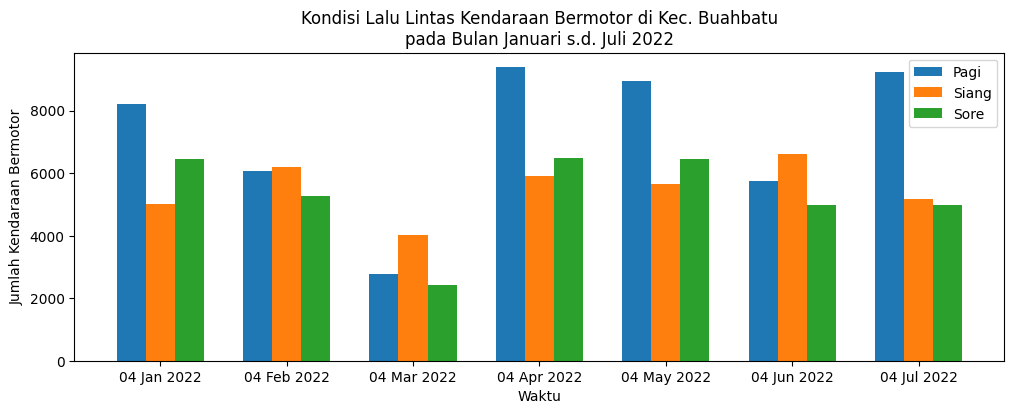

In [ ]:
fig,ax = plt.subplots(figsize=(12, 4))

# Menyimpan keys (tanggal) dan values (waktu pagi/siang/sore) untuk diproses menjadi bar chart
categories = motor_pagi.index
pagi = [c for c in motor_pagi.values]
siang = [c for c in motor_siang.values]
sore = [c for c in motor_sore.values]

# Adjust bar chart
bar_width = 0.23
index = np.arange(len(categories))

plt.bar(index-bar_width, pagi, bar_width, label='Pagi')
plt.bar(index, siang, bar_width, label='Siang')
plt.bar(index + bar_width, sore, bar_width, label='Sore')

# Keterangan Grafik
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kendaraan Bermotor')
plt.title('Kondisi Lalu Lintas Kendaraan Bermotor di Kec. Buahbatu\npada Bulan Januari s.d. Juli 2022')
plt.xticks(index, categories)
plt.legend()
plt.show()

In [ ]:
sum(pagi), sum(siang), sum(sore)

(50390, 38565, 37029)

### Penjelasan



*   Lalu lintas Kec. Buahbatu rata-rata mengalami kepadatan pemotor paling tinggi setiap pagi hari
*   Pada rentang 4 Febuari sampai 4 Maret, Lalu lintas Kec. Buahbatu mengalami penurunan drastis kepadatan pemotor dibanding rentang bulan lainnya
*   Pada rentang 4 Maret sampai 4 April, Lalu lintas Kec. Buahbatu mengalami kenaikan drastis kepadatan pemotor dibanding rentang bulan lainnya
*   Lalu lintas Kec. Buahbatu paling padat dan ramai dilalui oleh motor pada tanggal 4 April 2022.



## b. Tabel 2 dimensi

Tabel ini berisi informasi jumlah kendaraan yang akan dikelompokkan berdasarkan waktu (pagi/siang/sore) dan Nama Jalan di Kota Bandung

In [ ]:
df_vehicle_only = df_numeric.drop(["HEADWAY(s)", "GAP(s)", "85 P SPEED (Km/Jam)", "AVG. SPEED (Km/Jam)", "OCCUPANCY (%)"], axis=1)
ordered = df_vehicle_only.groupby(["Nama Jalan", "Waktu"]).sum()
ordered

TOTAL MOTOR  TOTAL MOBIL  BUS/TRUK  JUMLAH
Nama Jalan       Waktu                                            
SP. BATUNUNGGAL  pagi          2025          948       346    3319
                 siang         1337         1137       587    3061
                 sore          3182         1352       451    4985
SP. BUAH BATU    pagi         50390        13998      2088   66476
                 siang        38565        19545      2705   60815
                 sore         37029        17898      2511   57438
SP. CIBEREUM     pagi         62895        15983      1936   80814
                 siang        50323        19616      2999   72938
                 sore         72547        19006      1981   93534
SP. GEDEBAGE     pagi         19385         8091      1637   29113
                 siang        11779         9432      1801   23012
                 sore         16700         8389      1723   26812
SP. ISTANA PLAZA pagi         26696         8547       429   35672
                 siang        23726        11520       758   36004
                 sore         22544         8620       792   31956
SP. M.TOHA       pagi         53299        12006      2354   67659
                 siang        35648        14011      2040   51699
                 sore         43429        13267      1513   58209
SP. PASIR KALIKI pagi         21581        14119       940   36640
                 siang        15743        17221       625   33589
                 sore         20926        17631       391   38948
SP. PASIR KOJA   pagi          9639        10666      3397   23702
                 siang         6839        14197      3952   24988
                 sore          8220        12848      3153   24221
SP. PASTEUR      pagi         17345        12777      1166   31288
                 siang        15273        20371      1444   37088
                 sore         21092        23722      1864   46678
SP. SAMSAT       pagi         73983        29825      3245  107053
                 siang        47222        37044      3735   88001
                 sore         63923        37733      2988  104644
SP. UJUNG BERUNG pagi         39626         8017       871   48514
                 siang        34284         9743       831   44858
                 sore         39030         7937       746   47713

### Penjelasan

*   Lalu lintas SP. SAMSAT memiliki tingkat kepadatan paling tinggi
*   Lalu lintas SP. BATUNUNGGAL tingkat kepadatan paling rendah
*   Lalu lintas SP. SAMSAT pada pagi hari memiliki jumlah kendaraan paling banyak yakni 107053
*   Lalu lintas SP. SAMSAT pada pagi hari memiliki jumlah kendaraan paling dikit yakni 3061
*   Kendaraan bermotor paling banyak melalui SP. SAMSAT di pagi hari
*   Kendaraan mobil paling banyak melalui SP. SAMSAT di sore hari
*   Kendaraan bus/truk paling banyak melalui SP. PASIR KOJA di siang hari

## c. Histogram

In [ ]:
data.describe()["AVG. SPEED (Km/Jam)"]

count    211.000000
mean      25.372464
std       10.291374
min       11.310000
25%       19.375000
50%       23.120000
75%       28.250000
max       78.190000
Name: AVG. SPEED (Km/Jam), dtype: float64

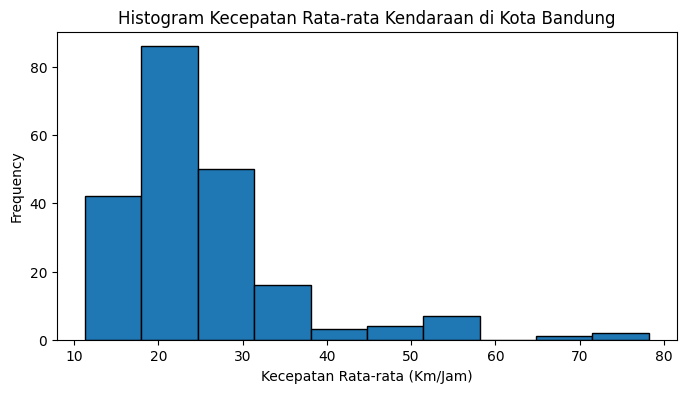

In [ ]:
hist_data = data["AVG. SPEED (Km/Jam)"]

# Histogram Jumlah Kendaraan
plt.figure(figsize=(8, 4))
plt.hist(hist_data, edgecolor='black')

# Keterangan
plt.title('Histogram Kecepatan Rata-rata Kendaraan di Kota Bandung')
plt.xlabel('Kecepatan Rata-rata (Km/Jam)')
plt.ylabel('Frequency')

plt.show()


### Penjelasan


*   Histogram di atas menunjukkan kemencengan data ke arah kiri (condong negatif)
*   Frekuensi tertinggi kecepatan rata-rata kendaraan terdapat di sekitar rentang 15 hingga 30 Km/Jam
- Frekuensi menurun untuk kecepatan rata-rata di atas 40 Km/jam
- Artinya, sebagian besar kendaraan di Kota Bandung melaju dengan kecepatan rata-rata 15 hingga 30 Km/Jam, sedangkan hanya sedikit kendaraan yang melaju dengan kecepatan rata-rata di atas 40 Km/jam.



# [3] Method 3: Scatter Plot & Correlation

## a. Scatter Plot

In [ ]:
# Menentukan Kolom yang akan dijadikan sebagai Independent atau Dependent Variable
independent = data[data["Nama Jalan"] == "SP. SAMSAT"]["JUMLAH"]
dependent = data[data["Nama Jalan"] == "SP. SAMSAT"]["OCCUPANCY (%)"]

preview = pd.DataFrame({
            "Jumlah": independent,
            "OCCUPANCY": dependent
          })

preview.head()

,Jumlah,OCCUPANCY
21,14962,73.08
22,11694,66.41
23,14599,68.72
54,15197,69.05
55,14248,66.25


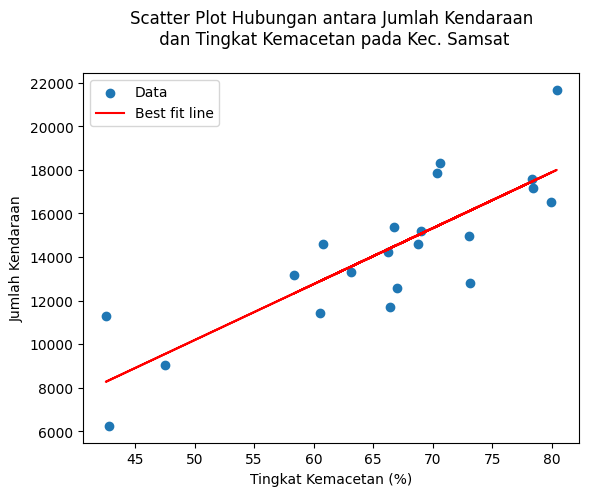

In [ ]:
# Scatter Plot
fig, ax1 = plt.subplots()
ax1.scatter(dependent, independent, label='Data')

# Keterangan
ax1.set_ylabel('Jumlah Kendaraan')
ax1.set_xlabel('Tingkat Kemacetan (%)')
ax1.set_title('Scatter Plot Hubungan antara Jumlah Kendaraan\n dan Tingkat Kemacetan pada Kec. Samsat\n')

# Best Fit Line
m, b = np.polyfit(dependent, independent, 1)
ax1.plot(np.array(dependent), np.array(m*dependent) + b, color='red', label='Best fit line')

ax1.legend()
plt.show()

### Penjelasan

- Terdapat korelasi positif antara dua variabel tersebut
- Semakin tinggi Tingkat Kemacetan, maka jumlah Kendaraan juga cenderung meningkat
- Ada beberapa titik yang jauh dari garis regresi, yang menandakan bahwa ada hari dengan tingkat kemacetan rendah tetapi jumlah kendaraannya tinggi
- Data  tersebar di sekitar garis regresi, namun terdapat beberapa outlier dimana jumlah kendaraan berbeda dari tren umum.

## b. Pearson Correlation

In [ ]:
# Rata-rata Tingkat Kemacetan (X): Dependent, dan Jumlah Kendaraan (Y): Independent
Y_mean = np.mean(independent)
X_mean = np.mean(dependent)

# Hitung jumlah hasil kali selisihnya
pembilang = np.sum((independent - Y_mean) * (dependent - X_mean))

# Jumlah kuadrat selisih setiap variabel
penyebut_Y = np.sum((independent - Y_mean) ** 2)
penyebut_X = np.sum((dependent - X_mean) ** 2)

# Hasil
correlation = pembilang / (np.sqrt(penyebut_Y) * np.sqrt(penyebut_X))
print("Nilai Korelasi: ", correlation)


Nilai Korelasi:  0.8276842368358946


### Penjelasan

- Nilai korelasi 0.82 menunjukkan hubungan positif kuat antara jumlah kendaraan dan tingkat kemacetan pada Kecamatan Samsat.
- Nilai ini menunjukkan bahwa ketika jumlah kendaraan meningkat, tingkat kemacetan juga meningkat.

# [4] Method 4: Linear Regression

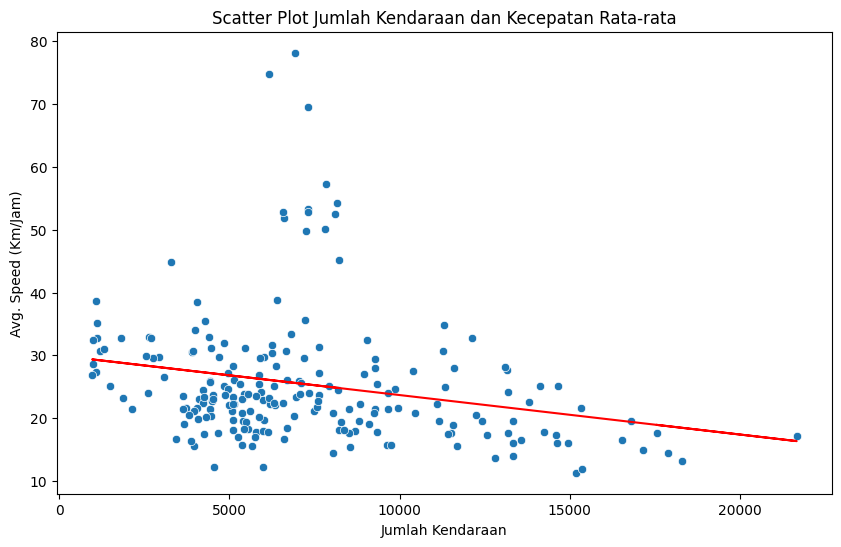

In [ ]:
# Variabel dependent dan independent
x = np.array(data['JUMLAH'])
y = np.array(data['AVG. SPEED (Km/Jam)'])

# Rata-rata X Dan Y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Variansi
covarience = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
variansi_x = np.var(x)

# Kemiringan garis
kemiringan = covarience / variansi_x
tipot_y = mean_y - kemiringan * mean_x

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.plot(x, tipot_y + kemiringan * x, color='red')
plt.title('Scatter Plot Jumlah Kendaraan dan Kecepatan Rata-rata')
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Avg. Speed (Km/Jam)')
plt.show()


In [ ]:
# Analisis Regresi
hasil = {
    "Kemiringan ": kemiringan,
    "Titik Potong sumbu Y ": tipot_y,
    "Korelasi ": data['AVG. SPEED (Km/Jam)'].corr(data['JUMLAH']),
}
hasil

{'Kemiringan ': -0.0006286824481687456,
 'Titik Potong sumbu Y ': 29.96524597908853,
 'Korelasi ': -0.2373767238126215}

### Penjelasan

Pada bagian linear regression kami menggunakan dua buah variable yakni jumlah kendaraan (x) sbg variabel independent dan juga kecepatan rata-rata (y) sbg variabel dependent

- Dapat dilihat bahwa titik-titik pada scatter plot memiliki tren menurun dari kiri ke kanan, yang mengindikasikan adanya korelasi negatif antara dua variabel tersebut

- Artinya semakin tinggi jumlah kendaraan, maka rata-rata dari kecepatan kendaraan semakin rendah

- Nilai kemiringan adalah -0.000626 yang berarti untuk setiap peningkatan jumlah kendaraan, maka kecepatan rata-rata berkurang sekitar 0.000626 Km/jam.

- Korelasi = -0.2374, menunjukkan adanya korelasi negatif yang lemah antara jumlah kendaraan dan kecepatan rata-rata.



# [5] Method 5: Hypothesis Testing

Text(0.5, 1.0, 'Histogram AVG. SPEED pada Berbagai Waktu')

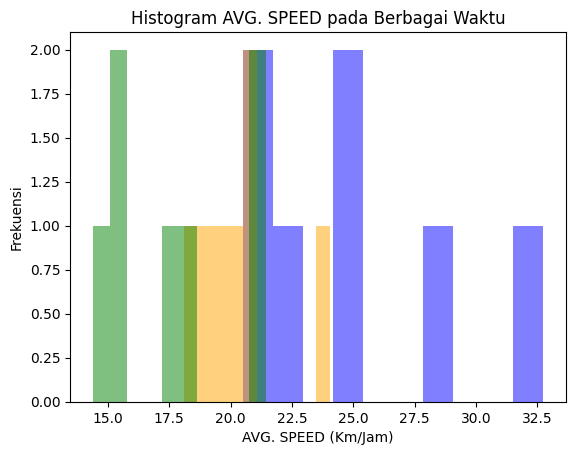

In [ ]:
# Filter data berdasarkan nama jalan dan waktu
nama_jalan_tertentu = "SP. BUAH BATU"
data_jalan_waktu = data[(data['Nama Jalan'] == nama_jalan_tertentu) & (data['Waktu'].isin(['pagi', 'siang', 'sore']))]

# Pisahkan data berdasarkan Waktu
pagi_data = data_jalan_waktu[data_jalan_waktu['Waktu'] == 'pagi']['AVG. SPEED (Km/Jam)']
siang_data = data_jalan_waktu[data_jalan_waktu['Waktu'] == 'siang']['AVG. SPEED (Km/Jam)']
sore_data = data_jalan_waktu[data_jalan_waktu['Waktu'] == 'sore']['AVG. SPEED (Km/Jam)']

plt.hist(pagi_data, alpha=0.5, label='Pagi', color='blue')
plt.hist(siang_data, alpha=0.5, label='Siang', color='orange')
plt.hist(sore_data, alpha=0.5, label='Sore', color='green')

plt.xlabel('AVG. SPEED (Km/Jam)')
plt.ylabel('Frekuensi')
plt.title('Histogram AVG. SPEED pada Berbagai Waktu')


In [ ]:
# Uji T Independen
t_statistic_pagi_siang, p_value_pagi_siang = ttest_ind(pagi_data, siang_data)
t_statistic_pagi_sore, p_value_pagi_sore = ttest_ind(pagi_data, sore_data)
t_statistic_siang_sore, p_value_siang_sore = ttest_ind(siang_data, sore_data)

# Menampilkan hasil uji T Independen
print("Pagi vs. Siang - T-Statistic:", t_statistic_pagi_siang)
print("Pagi vs. Siang - P-Value:", p_value_pagi_siang)

print("Pagi vs. Sore - T-Statistic:", t_statistic_pagi_sore)
print("Pagi vs. Sore - P-Value:", p_value_pagi_sore)

print("Siang vs. Sore - T-Statistic:", t_statistic_siang_sore)
print("Siang vs. Sore - P-Value:", p_value_siang_sore)

# Menyimpulkan hasil uji T Independen
alpha = 0.05
if p_value_pagi_siang < alpha:
    print("Pagi vs. Siang: Menolak hipotesis nol. Ada perbedaan signifikan dalam AVG. SPEED.")
else:
    print("Pagi vs. Siang: Hipotesis nol diterima. Tidak ada perbedaan signifikan dalam AVG. SPEED.")

if p_value_pagi_sore < alpha:
    print("Pagi vs. Sore: Menolak hipotesis nol. Ada perbedaan signifikan dalam AVG. SPEED.")
else:
    print("Pagi vs. Sore: Hipotesis nol diterima. Tidak ada perbedaan signifikan dalam AVG. SPEED.")

if p_value_siang_sore < alpha:
    print("Siang vs. Sore: Menolak hipotesis nol. Ada perbedaan signifikan dalam AVG. SPEED.")
else:
    print("Siang vs. Sore: Hipotesis nol diterima. Tidak ada perbedaan signifikan dalam AVG. SPEED.")

Pagi vs. Siang - T-Statistic: 2.5899754656379863
Pagi vs. Siang - P-Value: 0.023658976275510047
Pagi vs. Sore - T-Statistic: 3.822984692418936
Pagi vs. Sore - P-Value: 0.002426289428761147
Siang vs. Sore - T-Statistic: 2.177979037052649
Siang vs. Sore - P-Value: 0.05007469927921872
Pagi vs. Siang: Menolak hipotesis nol. Ada perbedaan signifikan dalam AVG. SPEED.
Pagi vs. Sore: Menolak hipotesis nol. Ada perbedaan signifikan dalam AVG. SPEED.
Siang vs. Sore: Hipotesis nol diterima. Tidak ada perbedaan signifikan dalam AVG. SPEED.


### Penjelasan

Implementasi uji hipotesis dengan menggunakan uji t independen untuk membandingkan kecepatan rata-rata (AVG. SPEED) antara waktu pagi, siang, dan sore di suatu jalan tertentu (SP. BUAH BATU). Berdasarkan tingkat signifikansi (alpha) yang ditetapkan, hasil uji t independen diinterpretasikan. Jika p-value kurang dari alpha, hipotesis nol ditolak, dan jika p-value lebih besar atau sama dengan alpha, hipotesis nol diterima.